In [4]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# load dataset
iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

In [5]:
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [6]:
type(iris.data), type(iris.target)

(numpy.ndarray, numpy.ndarray)

In [7]:
iris.data.shape

(150, 4)

# EDA

In [8]:
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Visual EDA

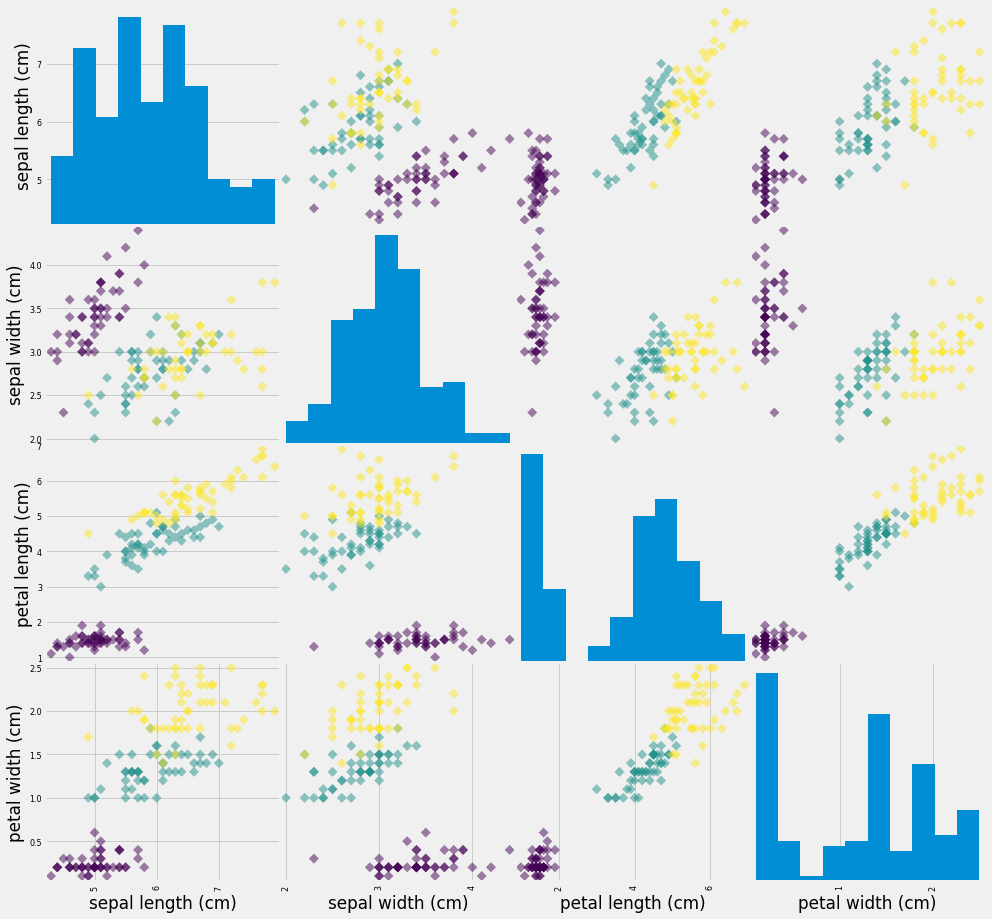

In [16]:
_ = pd.plotting.scatter_matrix(df, c = y, figsize = [15,15],
                              s = 50, marker='D')

# K-nn

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(iris['data'], iris['target'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [18]:
iris['data'].shape, iris['target'].shape

((150, 4), (150,))

In [26]:
# prediciting on unlabeled data
X_new =np.array([[5.6, 2.8, 3.0, 1.1],
                [5.7, 2.6, 3.8, 1.3],
                [4.7, 3.2, 1.3, 0.2]])
prediction = knn.predict(X_new)
X_new.shape


(3, 4)

# Measuring Model performance

In [31]:
# accuracy = fraction of correct predictions
# split data into training and test set
# fit/train on the training set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.3,
                                                   random_state=21, stratify=y)
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)



In [32]:
knn.score(X_test, y_test)

0.9555555555555556